In [19]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def exploration_progress(exp_res, maxIt, nGrey):
  unique_pos = set()
  unique_it = np.zeros(maxIt)
  for i in range(maxIt):
    for j in range(nGrey):
      pos = str(exp_res[i][j])
      if pos not in unique_pos:
        unique_pos.add(pos)
        unique_it[i] += 1
  return unique_it

In [22]:
def load_results(it):
  res_loc = '/content/gdrive/My Drive/GWO/ExplorationResults/'
  results = []
  for i in range(1,5):
    f = open(f'{res_loc}dataset{i}_it{it}.txt', 'rb')
    res = pickle.load(f)
    results.append(res) 
  return results

In [23]:
datasets = ['winequality-red', 'HeartEW', 'BreastEW', 'Ionosphere']
features = [ 11, 13, 30, 34 ]

In [24]:
def load_and_plot(it):
  results = load_results(it)
  fig = plt.figure(figsize = (20,12))
  n = 1
  for res in results:
    exploration = exploration_progress(res, it, 8)
    fig.add_subplot(2,2,n)
    plt.plot(exploration)
    plt.xlabel('iterations')
    plt.ylabel('unique solutions explored')
    plt.title(f'{datasets[n-1]} - [No. of features: {features[n-1]}]')
    n += 1

### MaxIt = 50

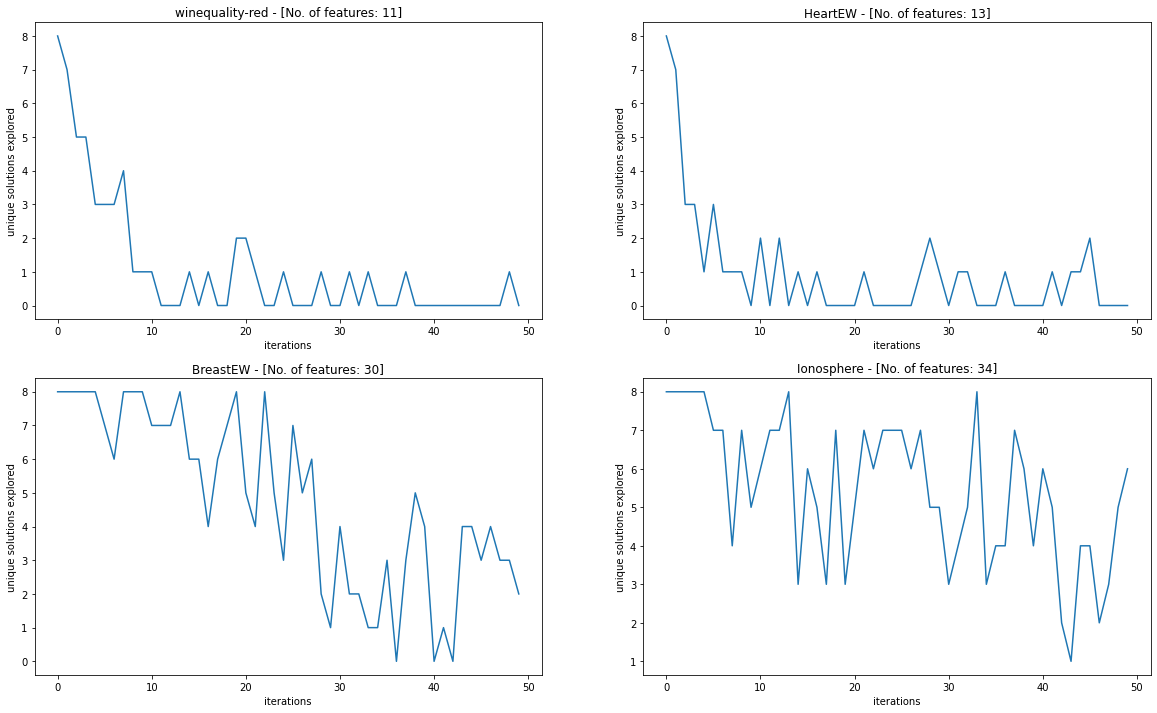

In [25]:
load_and_plot(50)

### MaxIt = 100

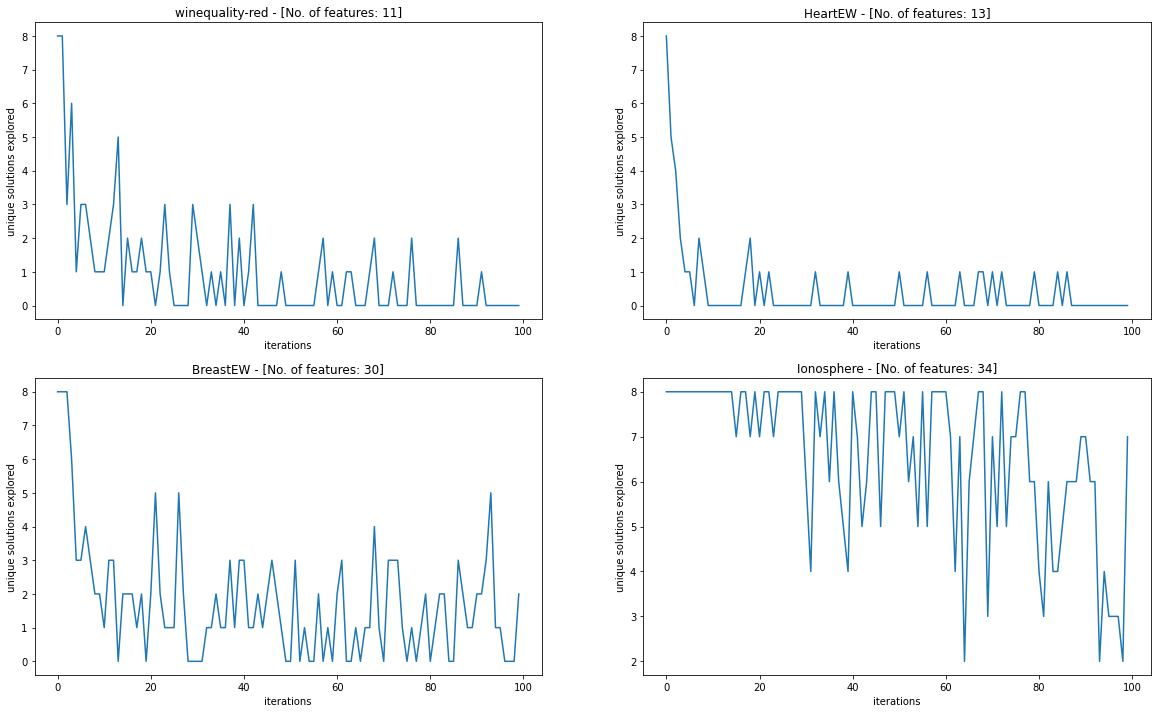

In [26]:
load_and_plot(100)

### MaxIt = 300

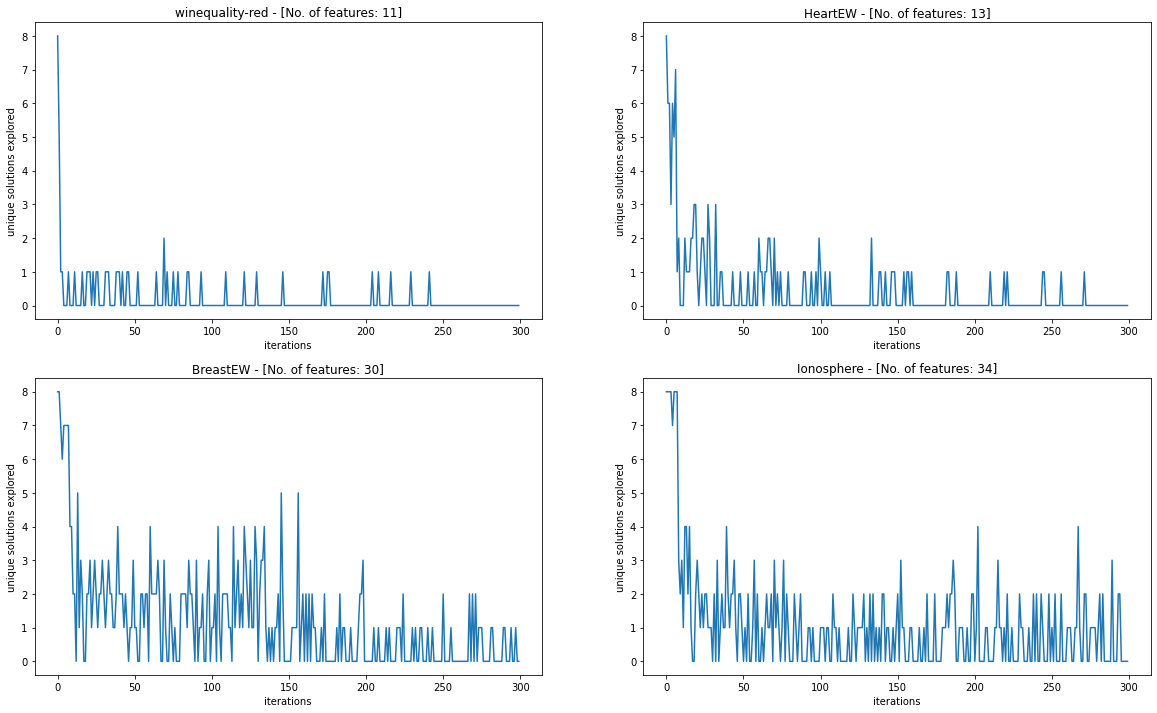

In [27]:
load_and_plot(300)